In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["font.family"] = "Open Sans"
matplotlib.rcParams["font.size"] = 10


"done"

'done'

In [3]:
# some setup
peptides = "L2 L3 L4".split()
base_dirs = [f"../sPTC+L234/RMSD-{peptide}/" for peptide in peptides]
n_dirs = len(base_dirs)
tids = [1, 2, 3]
n_tids = len(tids)

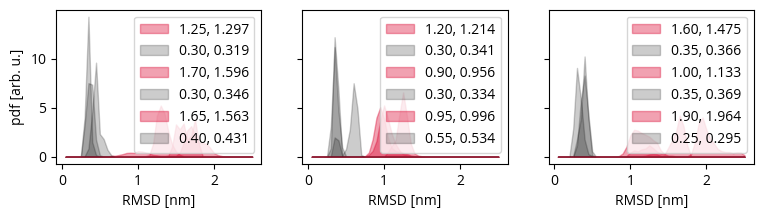

In [5]:
# common setup
first_frame = 1000
last_frame = 11000

# initialize figure
fig, axs = plt.subplots(ncols=n_dirs, nrows=1, figsize=(3*n_dirs, 2),
                       sharex=False, sharey=True)

for dir_i in range(n_dirs):
    
    peptide = peptides[dir_i]    
    base_dir = base_dirs[dir_i]
    ax = axs[dir_i]
    
    for tid_i in range(n_tids):

        tid = tids[tid_i]
        
        # read SMALL-L? data
        data = np.loadtxt(base_dir.replace("L234", peptide) + f"rmsd{tid}.dat").T / 10 # convert to nm
        hist, edges = np.histogram(data[first_frame:last_frame], range=[0, 2.5], bins=50, density=True)
        modus = np.max(hist)
        mean = np.mean(data[first_frame:last_frame])
        modus_rmsd = edges[np.where(hist == modus)][0]
        
        # plot
        ax.fill_between(edges[1:], hist, color="crimson", alpha=0.4,  label=f"{modus_rmsd:.2f}, {mean:.3f}")
        
        # read LARGE data
        data = np.loadtxt(base_dir.replace("sPTC+L234", "bPTC+peptides") + f"rmsd{tid}.dat").T / 10 # convert to nm
        hist, edges = np.histogram(data[first_frame:last_frame], range=[0, 2.5], bins=50, density=True)
        modus = np.max(hist)
        mean = np.mean(data[first_frame:last_frame])
        modus_rmsd = edges[np.where(hist == modus)][0]
        
        # plot
        ax.fill_between(edges[1:], hist, color="black", alpha=0.2, label=f"{modus_rmsd:.2f}, {mean:.3f}")

        
        # layout
        ax.set_xlabel("RMSD [nm]")
        ax.legend()
        if dir_i == 0:
            ax.set_ylabel("pdf [arb. u.]")
        if tid_i == 0:
            ax.set_title(base_dir.split("/")[3])
            
            
for ext in "pdf png".split():
    plt.savefig(f"../rmsd-peptides-fix-pdfs.{ext}", dpi=300)